In [1]:
from pathlib import Path

import awkward as ak
import matplotlib.pyplot as plt
import numpy as np

import pybes3 as p3

In [2]:
data_path = Path("../tests/test_data")

dst_data = p3.concatenate(
    [data_path / "test_full_mc_evt_1.dst"],
    "Event/TDstEvent",
)

header_data = p3.concatenate(
    [data_path / "test_full_mc_evt_1.dst"],
    "Event/TEvtHeader",
)

recobj_data = p3.concatenate(
    [data_path / "test_full_mc_evt_1.dst"],
    "Event/TEvtRecObject",
)

## Prepare the data

In [3]:
# Mdc tracks
mdc_trks = p3.analysis.MdcTrackCol(dst_data.m_mdcTrackCol)
mdc_trks

<MdcTrackCol: 10 events, 19 tracks>

In [4]:
# Database Connector
db_conn = p3.analysis.DatabaseConnector("bes3db2.ihep.ac.cn", "guest", "guestpass")

## Good track selection

In [5]:
vtx_db = p3.analysis.query_vertex(header_data.m_runId, "7.0.8", db_conn)
vtx_db

<Array [{x: 0.214, y: -0.187, ...}, ..., {...}] type='10 * {x: float64, y: ...'>

In [6]:
Bz = 1  # Tesla

pivot_helix = p3.analysis.pivot(mdc_trks.helix, mdc_trks.n_trks, Bz, vtx_db)
pivot_helix

<Array [[{dr: 0.00172, ...}, {...}], ...] type='10 * var * {dr: float64, ph...'>

In [8]:
dr_cut = 1
dz_cut = 10

good_trk_idx = p3.analysis.select_good_tracks(pivot_helix, mdc_trks.n_trks, dr_cut, dz_cut)
good_trk_idx

<Array [[True, False], [True, ...], ..., [True, True]] type='10 * var * bool'>

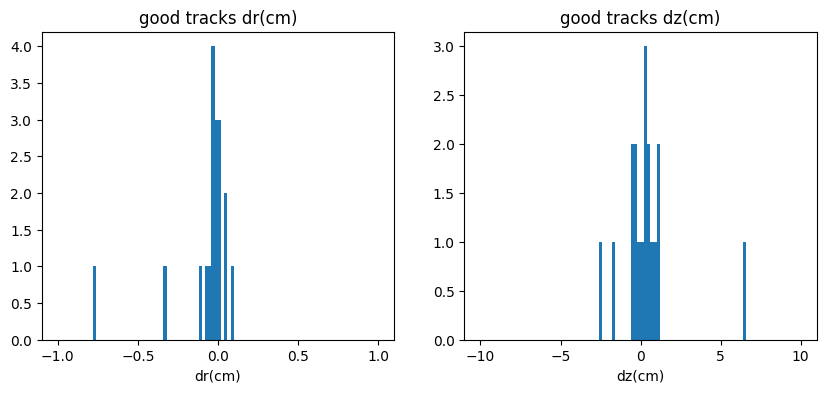

In [13]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("good tracks dr(cm)")
plt.hist(ak.flatten(pivot_helix[good_trk_idx].dr), bins=100, range=(-1, 1))
plt.xlabel("dr(cm)")

plt.subplot(1, 2, 2)
plt.title("good tracks dz(cm)")
plt.hist(ak.flatten(pivot_helix[good_trk_idx].dz), bins=100, range=(-10, 10))
plt.xlabel("dz(cm)")
plt.show()